## Packages

In [1]:
import sys
print(sys.version)

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

3.5.2 |Continuum Analytics, Inc.| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicolwon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicolwon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicolwon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicolwon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Load Data

In [ ]:
#!unzip reviews.zip -d .

In [2]:
hotelDf= pandas.read_csv('reviews4.csv')
hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']
hotelDf = hotelDf.dropna()
hotelDf = hotelDf.fillna('')

In [3]:
hotelDf.shape

(3418, 6)

In [23]:
hotelDf

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,531560410,data4\ca\154913\10259142\535933244.html,Element Calgary Airport,I really enjoyed my stay here. The room had a ...,5,positive
1,535933244,data4\ca\154913\10259142\537074672.html,Element Calgary Airport,We stayed one night in this new hotel and it's...,5,positive
2,537074672,data4\ca\154913\10259142\538137131.html,Element Calgary Airport,Stayed at this hotel for business trip purpose...,5,positive
3,538137131,data4\ca\154913\10259142\540014523.html,Element Calgary Airport,Very clean. Modern and bright. GREAT mattress ...,4,positive
4,504192408,data4\ca\154913\10276193\504653214.html,Hilton Garden Inn Calgary Downtown,My partner and I and another couple stayed in ...,4,positive
5,525634624,data4\ca\154913\10276193\525873908.html,Hilton Garden Inn Calgary Downtown,Checked in Sept 7. Nice King room. We unpacked...,2,negative
6,526344941,data4\ca\154913\10276193\526376534.html,Hilton Garden Inn Calgary Downtown,Stayed here for 3 nights. Overall this modern ...,4,positive
7,526376534,data4\ca\154913\10276193\529226007.html,Hilton Garden Inn Calgary Downtown,First time at this hotel and had a very comfor...,4,positive
8,534226299,data4\ca\154913\10276193\534225168.html,Hilton Garden Inn Calgary Downtown,"We had a great stay, clean room and had fun wa...",5,positive
9,534225168,data4\ca\154913\10276193\534447662.html,Hilton Garden Inn Calgary Downtown,Room and amenities were brilliant as was the g...,5,positive


In [5]:
hotelDf.hotelName.unique().size

70

## Q1 Sentiment Analysis and Aggregation

### (a)

In [4]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [5]:
reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewColumn','vader'])

100%|█████████████████████████████████████████████████████████████████████████████| 3418/3418 [00:06<00:00, 506.90it/s]


In [25]:
reviewDF

,reviewColumn,vader
0,I really enjoyed my stay here. The room had a ...,0.9701
1,We stayed one night in this new hotel and it's...,0.9939
2,Stayed at this hotel for business trip purpose...,0.9530
3,Very clean. Modern and bright. GREAT mattress ...,0.9090
4,My partner and I and another couple stayed in ...,0.8108
5,Checked in Sept 7. Nice King room. We unpacked...,0.7048
6,Stayed here for 3 nights. Overall this modern ...,0.8484
7,First time at this hotel and had a very comfor...,0.8655
8,"We had a great stay, clean room and had fun wa...",0.9483
9,Room and amenities were brilliant as was the g...,0.9001


In [6]:
finalDf = hotelDf.merge(reviewDF, on='reviewColumn')
# finalDf = hotelDf[['hotelName','ratingScore','groundTruth']].join(reviewDF)

In [29]:
finalDf

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,531560410,data4\ca\154913\10259142\535933244.html,Element Calgary Airport,I really enjoyed my stay here. The room had a ...,5,positive,0.9701
1,535933244,data4\ca\154913\10259142\537074672.html,Element Calgary Airport,We stayed one night in this new hotel and it's...,5,positive,0.9939
2,537074672,data4\ca\154913\10259142\538137131.html,Element Calgary Airport,Stayed at this hotel for business trip purpose...,5,positive,0.9530
3,538137131,data4\ca\154913\10259142\540014523.html,Element Calgary Airport,Very clean. Modern and bright. GREAT mattress ...,4,positive,0.9090
4,504192408,data4\ca\154913\10276193\504653214.html,Hilton Garden Inn Calgary Downtown,My partner and I and another couple stayed in ...,4,positive,0.8108
5,525634624,data4\ca\154913\10276193\525873908.html,Hilton Garden Inn Calgary Downtown,Checked in Sept 7. Nice King room. We unpacked...,2,negative,0.7048
6,526344941,data4\ca\154913\10276193\526376534.html,Hilton Garden Inn Calgary Downtown,Stayed here for 3 nights. Overall this modern ...,4,positive,0.8484
7,526376534,data4\ca\154913\10276193\529226007.html,Hilton Garden Inn Calgary Downtown,First time at this hotel and had a very comfor...,4,positive,0.8655
8,534226299,data4\ca\154913\10276193\534225168.html,Hilton Garden Inn Calgary Downtown,"We had a great stay, clean room and had fun wa...",5,positive,0.9483
9,534225168,data4\ca\154913\10276193\534447662.html,Hilton Garden Inn Calgary Downtown,Room and amenities were brilliant as was the g...,5,positive,0.9001


In [7]:
hotelNames = finalDf.hotelName.unique()
hotelNames.size

70

In [8]:
def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [9]:
hotelRatingDfGt = getHotelRank(finalDf)
hotelRatingDfVader = getHotelRank(finalDf, measure='vader')

In [14]:
hotelRatingDfGt

,hotelName,avgRatingScore
63,Hotel Elan,4.904762
43,Calgary Marriott Downtown Hotel,4.763636
0,Element Calgary Airport,4.750000
58,Residence Inn by Marriott Calgary Airport,4.710526
9,Hotel Le Germain Calgary,4.657407
54,Best Western Premier Freeport Inn & Suites,4.621622
59,Courtyard by Marriott Calgary Airport,4.615385
15,Best Western Plus Port O\'Call Hotel,4.564706
55,Hampton Inn & Suites By Hilton Calgary- Univer...,4.539394
66,Homewood Suites by Hilton Calgary-Airport,4.538462


In [15]:
hotelRatingDfVader

,hotelName,avgRatingScore
57,Wingate by Wyndham Calgary South,0.965800
0,Element Calgary Airport,0.956500
17,Best Western Plus Calgary Centre Inn,0.938207
37,Comfort Inn & Suites South,0.931757
2,Homewood Suites by Hilton Calgary Downtown,0.924918
28,Sheraton Cavalier Hotel,0.923177
24,Canadas Best Value Inn Chinook Station,0.912524
35,Comfort Inn & Suites Calgary Airport,0.907677
58,Residence Inn by Marriott Calgary Airport,0.901929
43,Calgary Marriott Downtown Hotel,0.897631


### (b)

In [10]:
print("Ground Truth:")
print("Top 5 Hotels")
print(hotelRatingDfGt.head())
print("\nBottom 5 Hotels")
print(hotelRatingDfGt.tail())

Ground Truth:
Top 5 Hotels
                                    hotelName  avgRatingScore
63                                 Hotel Elan        4.904762
43            Calgary Marriott Downtown Hotel        4.763636
0                     Element Calgary Airport        4.750000
58  Residence Inn by Marriott Calgary Airport        4.710526
9                    Hotel Le Germain Calgary        4.657407

Bottom 5 Hotels
                                            hotelName  avgRatingScore
34  Ramada Plaza Calgary Airport Hotel and Confere...        2.300000
46                         Super 8 Village Calgary AB        2.296296
50  Travelodge Hotel Calgary International Airport...        2.038462
51             Travelodge Hotel Calgary Macleod Trail        1.655172
45                   Ramada Limited Calgary Northwest        1.541667


In [11]:
print("Vader:")
print("Top 5 Hotels")
print(hotelRatingDfVader.head())
print("\nBottom 5 Hotels")
print(hotelRatingDfVader.tail())

Vader:
Top 5 Hotels
                                    hotelName  avgRatingScore
28                    Sheraton Cavalier Hotel        0.962738
0                     Element Calgary Airport        0.956500
58  Residence Inn by Marriott Calgary Airport        0.942253
57           Wingate by Wyndham Calgary South        0.939400
63                                 Hotel Elan        0.934190

Bottom 5 Hotels
                                            hotelName  avgRatingScore
24             Canadas Best Value Inn Chinook Station        0.189503
50  Travelodge Hotel Calgary International Airport...        0.149737
21              Coast Plaza Hotel & Conference Centre        0.114663
45                   Ramada Limited Calgary Northwest       -0.127279
51             Travelodge Hotel Calgary Macleod Trail       -0.165507


There is some overlap - Hotel Elan, Element Calgary Airport and Residence Inn are in the top 5 for both ground truth and vader, and Ramada Limtied Calgary Northwest and two Travelodge Hotels are in the bottom 5 for both metrics.

This indicates that sentiment does not always correlate with rating, although there is some overlap. Perhaps there are some reviews that skew the results. One hypothetical example is if several 5 star raters of Sheraton Cavalier spoke extremely highly of the hotel, whereas 5 star raters of Hotel Elan were happy with the hotel but did not display as extreme levels of excitement.

## Q2 Frequency Analysis

### (a)

In [12]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [13]:
topkGroundPos = getTopK(df=hotelDf, k=50, label_value='positive')
topkGroundNeg = getTopK(df=hotelDf, k=50, label_value='negative')

In [20]:
print('Most Frequent Positive Words')
print(pandas.DataFrame(topkGroundPos))
print('Most Frequent Negative Words')
print(pandas.DataFrame(topkGroundNeg))

Most Frequent Positive Words
              0     1
0         great  1698
1          good  1315
2       calgary  1295
3         clean  1153
4     breakfast  1104
5          nice  1082
6         would   966
7        stayed   883
8      friendly   854
9       service   853
10  comfortable   827
11         well   819
12          one   784
13     location   713
14      airport   641
15         pool   611
16        night   605
17      helpful   587
18     downtown   553
19   restaurant   548
20         also   536
21          bed   533
22         area   512
23         desk   512
24        front   510
25         time   505
26    excellent   495
27       really   493
28         free   483
29         food   480
30        close   462
31      parking   450
32          get   417
33        place   415
34         beds   410
35         like   390
36        check   386
37     bathroom   381
38        could   372
39       modern   365
40    recommend   359
41     business   357
42  restaurants   356
43 

Top positive frequent words included positive adjectives such as great, good, clean, nice and contains calgary as top frequent word.

Top negative frequent words strangely enough also included 'good'... desk was also included, perhaps leading to 'front desk'?

### (b)

In [14]:
tagger = PerceptronTagger()
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
pos_tag = tagger.tag

In [15]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [16]:
# Create phrase tree
chunker = nltk.RegexpParser(grammar)

In [17]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [18]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [19]:
def getTopK_Phrase(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    # Top-k frequent terms
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k) 
    return topk

In [20]:
topkPhrasePos = getTopK_Phrase(hotelDf, k=50, label_value="positive")
topkPhraseNeg = getTopK_Phrase(hotelDf, k=50, label_value="negative")

In [28]:
topkPhrasePos

[('front desk', 171),
 ('hot tub', 103),
 ('front desk staff', 95),
 ('downtown calgari', 87),
 ('hotel art', 81),
 ('calgari tower', 63),
 ('great locat', 59),
 ('comfort bed', 57),
 ('breakfast buffet', 51),
 ('great place', 51),
 ('great hotel', 47),
 ('room servic', 47),
 ('hotel staff', 46),
 ('hotel room', 45),
 ('friendli staff', 45),
 ('pool area', 43),
 ('next time', 43),
 ('free breakfast', 42),
 ('good valu', 40),
 ('good locat', 39),
 ('continent breakfast', 39),
 ('great stay', 35),
 ('night stay', 34),
 ('first time', 33),
 ('le germain', 33),
 ('calgari airport', 33),
 ('next morn', 33),
 ('nice touch', 32),
 ('busi trip', 31),
 ('calgari stamped', 30),
 ('nice hotel', 29),
 ('busi travel', 28),
 ('easi access', 28),
 ('water slide', 28),
 ('bedroom suit', 26),
 ('next day', 26),
 ('complimentari breakfast', 26),
 ('good hotel', 25),
 ('minut walk', 25),
 ('hotel restaur', 25),
 ('clean room', 25),
 ('great servic', 24),
 ('free shuttl', 24),
 ('shuttl servic', 24),
 ('g

In [29]:
topkPhraseNeg

[('front desk', 117),
 ('hot tub', 42),
 ('front desk staff', 32),
 ('next day', 31),
 ('credit card', 28),
 ('next morn', 28),
 ('hotel room', 24),
 ('continent breakfast', 20),
 ('hot water', 18),
 ('differ room', 18),
 ('non smoke room', 17),
 ('park lot', 17),
 ('night stay', 14),
 ('room servic', 14),
 ('air condition', 14),
 ('sever time', 13),
 ('first night', 12),
 ('great locat', 12),
 ('clean room', 12),
 ('star hotel', 12),
 ('free breakfast', 12),
 ('comfort inn', 11),
 ('first time', 11),
 ('desk clerk', 11),
 ('good locat', 10),
 ('phone call', 10),
 ('new room', 10),
 ('second floor', 10),
 ('custom servic', 10),
 ('downtown calgari', 10),
 ('smoke room', 10),
 ('hotel staff', 10),
 ('long time', 10),
 ('second time', 9),
 ('room rate', 9),
 ('holiday inn', 9),
 ('hampton inn', 9),
 ('second night', 9),
 ('last night', 9),
 ('coffe maker', 9),
 ('sofa bed', 8),
 ('air condit', 8),
 ('next time', 8),
 ('airport hotel', 8),
 ('queen bed', 8),
 ('stamped week', 8),
 ('clean

There is a lot overlap between the top k positive and negative phrases. Specifically, 'front desk', 'hot tub', and 'front desk staff' were the top 3 phrases for both positive and negative. This may be because these features were of particular interest to reviewers, although their opinions on whether or not they were good or bad are quite divided.

## Q3 Mutual Information

### (a)

In [21]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewColumn'].values
    
    if type(stopwords) == list:
        stop = stopwords
    else:
        stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [22]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [32]:
finaldf

,hotelName,ratingScore,groundTruth,reviewColumn,vader,hotel,room,staff,stay,great,...,maybe,least,seems,traffic,starbucks,future,option,fact,four,furniture
0,Element Calgary Airport,5,positive,I really enjoyed my stay here. The room had a ...,0.9701,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Element Calgary Airport,5,positive,We stayed one night in this new hotel and it's...,0.9939,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Element Calgary Airport,5,positive,Stayed at this hotel for business trip purpose...,0.9530,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Element Calgary Airport,4,positive,Very clean. Modern and bright. GREAT mattress ...,0.9090,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hilton Garden Inn Calgary Downtown,4,positive,My partner and I and another couple stayed in ...,0.8108,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Hilton Garden Inn Calgary Downtown,2,negative,Checked in Sept 7. Nice King room. We unpacked...,0.7048,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Hilton Garden Inn Calgary Downtown,4,positive,Stayed here for 3 nights. Overall this modern ...,0.8484,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Hilton Garden Inn Calgary Downtown,4,positive,First time at this hotel and had a very comfor...,0.8655,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Hilton Garden Inn Calgary Downtown,5,positive,"We had a great stay, clean room and had fun wa...",0.9483,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Hilton Garden Inn Calgary Downtown,5,positive,Room and amenities were brilliant as was the g...,0.9001,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [34]:
miScoredf = getMI(topk, finaldf)

In [35]:
miScoredf.head(50)

,Word,MI Score
417,germain,0.033058
345,someone,0.032895
394,hyatt,0.032233
57,modern,0.032213
295,dirty,0.032134
18,comfortable,0.032066
487,slide,0.031998
75,spacious,0.031899
290,fairmont,0.031837
125,told,0.031815


Germain, Fairmont and Hyatt were top words, but they are also part of top hotel names (as ranked by ground truth).
People are likely mentioning the names of hotels in their reviews of them, however names should not be indicate of positivity or negativity.

Other words were more reasonable in indicating sentiment, ie. dirty, modern, spacious.


### (b)

In [36]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewColumn'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [37]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF)

In [38]:
finaldf_phrase

,hotelName,ratingScore,groundTruth,reviewColumn,vader,front desk,hot tub,front desk staff,downtown calgari,hotel art,...,first night,complimentari breakfast,bedroom suit,queen bed,clean staff,hot water,shuttl servic,good size,second floor,great servic
0,Element Calgary Airport,5,positive,I really enjoyed my stay here. The room had a ...,0.9701,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Element Calgary Airport,5,positive,We stayed one night in this new hotel and it's...,0.9939,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Element Calgary Airport,5,positive,Stayed at this hotel for business trip purpose...,0.9530,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Element Calgary Airport,4,positive,Very clean. Modern and bright. GREAT mattress ...,0.9090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hilton Garden Inn Calgary Downtown,4,positive,My partner and I and another couple stayed in ...,0.8108,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Hilton Garden Inn Calgary Downtown,2,negative,Checked in Sept 7. Nice King room. We unpacked...,0.7048,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Hilton Garden Inn Calgary Downtown,4,positive,Stayed here for 3 nights. Overall this modern ...,0.8484,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Hilton Garden Inn Calgary Downtown,4,positive,First time at this hotel and had a very comfor...,0.8655,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Hilton Garden Inn Calgary Downtown,5,positive,"We had a great stay, clean room and had fun wa...",0.9483,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Hilton Garden Inn Calgary Downtown,5,positive,Room and amenities were brilliant as was the g...,0.9001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
miScoredf = getMI(topk_phrase, finaldf_phrase)
miScoredf

,Word,MI Score
33,le germain,0.032081
7,calgari tower,0.031815
32,credit card,0.030904
12,breakfast buffet,0.030880
27,clean room,0.030761
4,hotel art,0.030715
14,hotel staff,0.030646
46,shuttl servic,0.030626
35,water slide,0.030568
28,park lot,0.030501


Similarly, hotel names/locations were part of the top 2 noun phrases, but these names should not be used to indicate sentiment, although it is understandable why they are included in the list.

Many other terms or location/service related (to the hotel), which is helpful in showing that these things were of interest in establishing the user's expererience. 

## Q4 Pointwise Mutual Information

### (a)

In [23]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [30]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [35]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [43]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 26.05it/s]


In [44]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
417,germain,0.236042
394,hyatt,0.205732
433,concierge,0.188144
290,fairmont,0.182790
442,spa,0.171050
454,palliser,0.164794
479,welcome,0.153658
494,starbucks,0.151959
343,conference,0.144043
438,lighting,0.137910


In [45]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
487,slide,0.689153
345,someone,0.684698
295,dirty,0.603149
440,credit,0.559535
382,queen,0.540117
435,sheets,0.540117
312,card,0.497100
346,worked,0.480898
432,change,0.480398
305,wanted,0.459537


As with the previous results, hotel names were some of the top PMI words (positive).

The negative PMI results were a little more vague, although dirty is definitely a negative sentiment inducing word. Credit card seems to occur repeatedly as well in negative results, as does someone (although the word someone is very vague and does not provide any useful information).

### (b)

In [46]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_phrase, topk = topk_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.57it/s]


In [47]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
33,le germain,0.253742
7,calgari tower,0.190228
46,shuttl servic,0.179634
12,breakfast buffet,0.156578
26,calgari airport,0.155301
14,hotel staff,0.138229
47,good size,0.135958
4,hotel art,0.125908
30,nice touch,0.124530
22,great hotel,0.117166


In [48]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
32,credit card,0.684698
27,clean room,0.579338
35,water slide,0.546548
28,park lot,0.514799
40,first night,0.492327
43,queen bed,0.325557
20,good locat,0.263485
45,hot water,0.242866
39,good hotel,0.227117
41,complimentari breakfast,0.207774


Many locations were included among the positive and negative PMI phrases. For positive, it seems like reviewers really appreciated shuttle service, as calgari airport, shuttle service and free shuttle were among the top phrases.

For negative PMI, it was interesting to see positive phrases appear among the top - ie. clean room, good locat, good hotel, complimentary breakfast, and it is unclear to me why these are in the negative PMI results.

### (c)

In [26]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if px == 0:
                pmi = 0
            elif py == 0:
                pmi = 0
            elif pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [34]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if px == 0:
        pmi = 0
    elif py == 0:
        pmi = 0
    elif pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [27]:
tophotel = hotelRatingDfGt.head(1)

topHotelDf = hotelDf[hotelDf['hotelName'].isin(tophotel['hotelName'])].reset_index()
topHotelReviewDf = evalSentences(topHotelDf['reviewColumn'].as_matrix(), to_df=True, columns=['reviewColumn','vader'])

# topHotelDf = topHotelDf.merge(topHotelReviewDf, on='reviewColumn')
topHotelDf

C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 349.97it/s]


,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,3448,348907691,data4\ca\154913\4187517\349865019.html,Hotel Elan,This is an excellent hotel. The location is go...,5,positive
1,3449,349865019,data4\ca\154913\4187517\350059866.html,Hotel Elan,I stayed at the Elan Hotel for a business trip...,5,positive
2,3450,391946254,data4\ca\154913\4187517\392213175.html,Hotel Elan,"The staff were always willing to help, looking...",5,positive
3,3451,392213175,data4\ca\154913\4187517\392554117.html,Hotel Elan,Hotel Elan gets it that most travelers today h...,5,positive
4,3452,392554117,data4\ca\154913\4187517\392731536.html,Hotel Elan,Very cool hotel. Modern decor. Fabulous bathro...,5,positive
5,3453,392731536,data4\ca\154913\4187517\392902790.html,Hotel Elan,"we stayed at a very big and comfortable room, ...",5,positive
6,3454,392902790,data4\ca\154913\4187517\393661275.html,Hotel Elan,Hotel Elan is definitely one of the best hotel...,5,positive
7,3455,408921265,data4\ca\154913\4187517\409063901.html,Hotel Elan,I was a bit hesitant to book Hotel Elan as I h...,5,positive
8,3456,409063901,data4\ca\154913\4187517\410013185.html,Hotel Elan,A beautiful modern hotel with all the trimming...,5,positive
9,3457,412738405,data4\ca\154913\4187517\414550672.html,Hotel Elan,"Fabulous staff, lovely property and a great ne...",5,positive


In [28]:
topHotelk, topHotelFinalDf = dataFrameTransformation(topHotelDf, topHotelReviewDf, k=50)
# topHotelk_phrase, topHotelFinalDf_phrase = newDataFrameTransformation(topHotelDf, topHotelReviewDf)

In [ ]:
topHotelk

In [ ]:
topHotelFinalDf

In [36]:
# pmiposlist, pmineglist, pmidf = pmiForAllCal(topHotelFinalDf, topk=topHotelk)
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(topHotelFinalDf, topk=topHotelk)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.11it/s]


In [37]:
pmiposlist_phrase

,word,pmi
0,hotel,0.0
1,room,0.0
2,great,0.0
3,breakfast,0.0
4,modern,0.0
5,staff,0.0
6,clean,0.0
7,well,0.0
8,good,0.0
9,free,0.0


In [38]:
pmineglist_phrase

,word,pmi
0,hotel,0
1,room,0
2,great,0
3,breakfast,0
4,modern,0
5,staff,0
6,clean,0
7,well,0
8,good,0
9,free,0


In [42]:
bottomHotel = hotelRatingDfGt.tail(1)

bottomHotelDf = hotelDf[hotelDf['hotelName'].isin(bottomHotel['hotelName'])].reset_index()
bottomHotelReviewDf = evalSentences(bottomHotelDf['reviewColumn'].as_matrix(), to_df=True, columns=['reviewColumn','vader'])

bottomHotelk, bottomHotelFinalDf = dataFrameTransformation(bottomHotelDf, bottomHotelReviewDf, k=50)

pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(bottomHotelFinalDf, topk=bottomHotelk)

pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.75it/s]


,word,pmi
49,could,1.791759
14,got,1.568616
48,really,1.568616
43,rooms,1.568616
44,checked,1.386294
30,good,1.386294
26,staff,1.232144
5,stay,0.875469
2,hotel,0.613104
0,room,0.133531


In [43]:
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
25,new,0.042560
40,first,0.042560
22,well,0.042560
23,time,0.042560
24,bit,0.042560
1,place,0.042560
42,building,0.042560
27,two,0.042560
28,shower,0.042560
29,hair,0.042560


Top Hotel - all the pmi scores are 0 because px is 0 (because there are no negative reviews)

Bottom hotel - the top ranked words are all rather vague and undescriptive, and do not provide much information.

## Q5 General Plots

### (a)

#### (a)

In [51]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

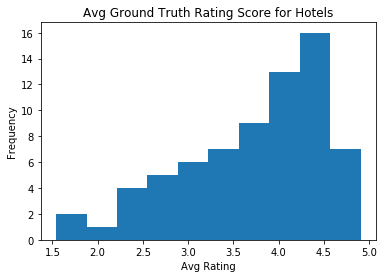

In [52]:
plt.hist(hotelRatingDfGt['avgRatingScore'].values)
plt.title('Avg Ground Truth Rating Score for Hotels')
plt.xlabel('Avg Rating')
plt.ylabel('Frequency')
fig = plt.gcf()

C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


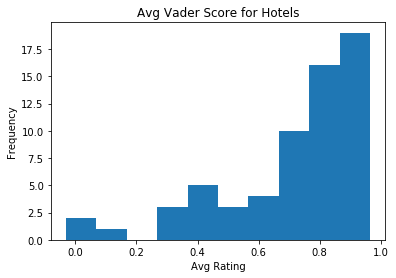

In [53]:
plt.hist(hotelRatingDfVader['avgRatingScore'].values)
plt.title('Avg Vader Score for Hotels')
plt.xlabel('Avg Rating')
plt.ylabel('Frequency')
fig = plt.gcf()

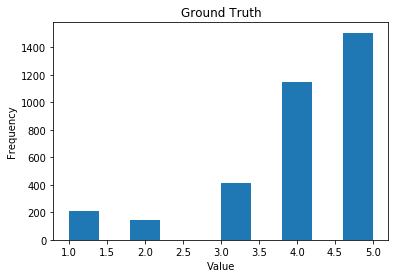

In [54]:
getHistogram('ratingScore', 'Ground Truth')

C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


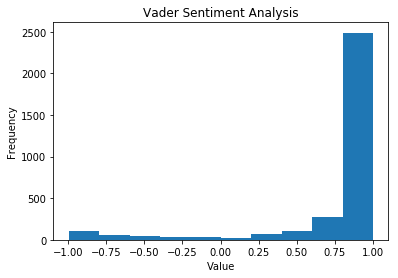

In [55]:
getHistogram('vader', 'Vader Sentiment Analysis')

Ground truth scores were much more even than vader results, with vader scores being very much right skewed.

#### (b)

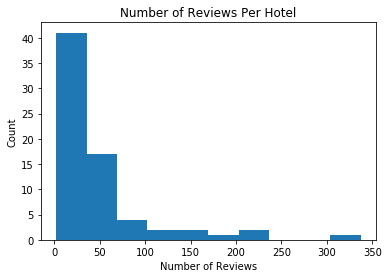

In [56]:
plt.hist(hotelDf['hotelName'].value_counts())
plt.title('Number of Reviews Per Hotel')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
fig = plt.gcf()

Most hotels had 0-50 reviews, and very few hotels had many reviews. These results are unsurprising - it seems more likely for a hotel to have fewer results than very many.

### (b)

#### (a)

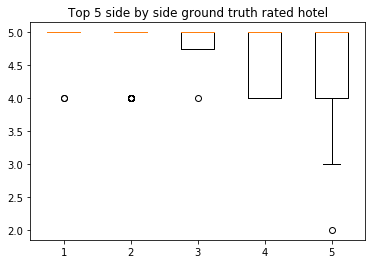

In [57]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

gtdata = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(gtdata)
plt.title('Top 5 side by side ground truth rated hotel')
plt.show()

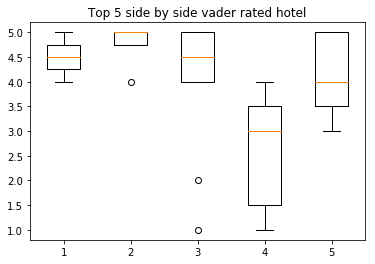

In [58]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfVader.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

vaderdata = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(vaderdata)
plt.title('Top 5 side by side vader rated hotel')
plt.show()

#### (b)

In [59]:
print('Mean and Variance of Ground Truth Scores for Top 5 GT Hotels\n')
for hotel in gtdata:
    print('Mean', hotel.mean(), 'Variance', hotel.var())
    
print('\nMean and Variance of Ground Truth Scores for Top 5 Vader Hotels\n')
for hotel in vaderdata:
    print('Mean', hotel.mean(), 'Variance', hotel.var())

Mean and Variance of Ground Truth Scores for Top 5 GT Hotels

Mean 4.904761904761905 Variance 0.09047619047619047
Mean 4.763636363636364 Variance 0.18383838383838377
Mean 4.75 Variance 0.25
Mean 4.7105263157894735 Variance 0.21123755334281646
Mean 4.657407407407407 Variance 0.33789836347975893

Mean and Variance of Ground Truth Scores for Top 5 Vader Hotels

Mean 4.5 Variance 0.5
Mean 4.75 Variance 0.25
Mean 4.142857142857143 Variance 1.5164835164835166
Mean 2.5714285714285716 Variance 1.6190476190476193
Mean 4.090909090909091 Variance 0.6909090909090908


#### (c)

The boxplots are more informative, as you can see how the data is distributed and can understand quartiles, medians, and outliers, and can also get a sense of the mean and how much the data varies.

### (c)

#### (a)

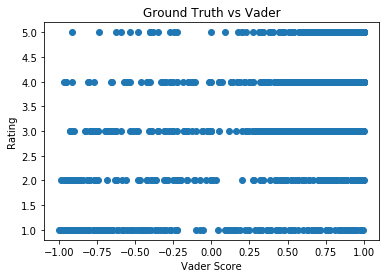

In [30]:
y = finalDf['ratingScore'].values
x = finalDf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')
plt.title('Ground Truth vs Vader')
fig = plt.gcf()

In [31]:
finalDf

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,531560410,data4\ca\154913\10259142\535933244.html,Element Calgary Airport,I really enjoyed my stay here. The room had a ...,5,positive,0.9701
1,535933244,data4\ca\154913\10259142\537074672.html,Element Calgary Airport,We stayed one night in this new hotel and it's...,5,positive,0.9939
2,537074672,data4\ca\154913\10259142\538137131.html,Element Calgary Airport,Stayed at this hotel for business trip purpose...,5,positive,0.9530
3,538137131,data4\ca\154913\10259142\540014523.html,Element Calgary Airport,Very clean. Modern and bright. GREAT mattress ...,4,positive,0.9090
4,504192408,data4\ca\154913\10276193\504653214.html,Hilton Garden Inn Calgary Downtown,My partner and I and another couple stayed in ...,4,positive,0.8108
5,525634624,data4\ca\154913\10276193\525873908.html,Hilton Garden Inn Calgary Downtown,Checked in Sept 7. Nice King room. We unpacked...,2,negative,0.7048
6,526344941,data4\ca\154913\10276193\526376534.html,Hilton Garden Inn Calgary Downtown,Stayed here for 3 nights. Overall this modern ...,4,positive,0.8484
7,526376534,data4\ca\154913\10276193\529226007.html,Hilton Garden Inn Calgary Downtown,First time at this hotel and had a very comfor...,4,positive,0.8655
8,534226299,data4\ca\154913\10276193\534225168.html,Hilton Garden Inn Calgary Downtown,"We had a great stay, clean room and had fun wa...",5,positive,0.9483
9,534225168,data4\ca\154913\10276193\534447662.html,Hilton Garden Inn Calgary Downtown,Room and amenities were brilliant as was the g...,5,positive,0.9001


In [32]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

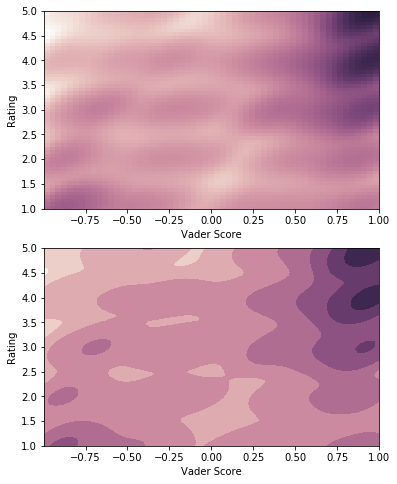

In [33]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Rating scores and vader scores tend to be quite correlated (the top right corner is very dense).

This shows that human ratings tend to correlate with (vader) sentiment.

#### (b)

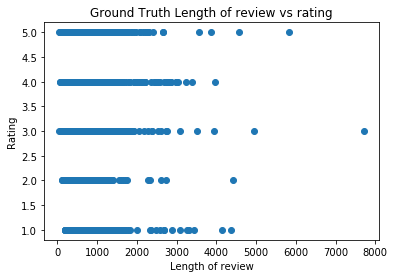

In [34]:
y = finalDf['ratingScore'].values
x = finalDf['reviewColumn'].str.len()
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of review')
plt.title('Ground Truth Length of review vs rating')
fig = plt.gcf()

Text(0, 0.5, 'Rating')

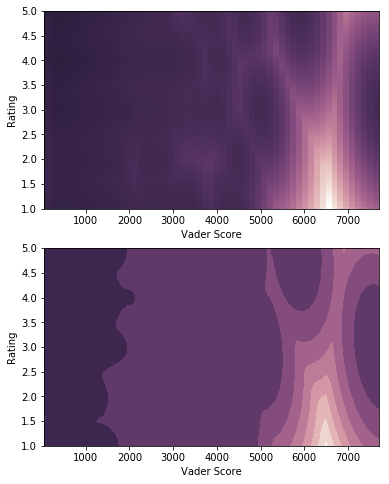

In [35]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

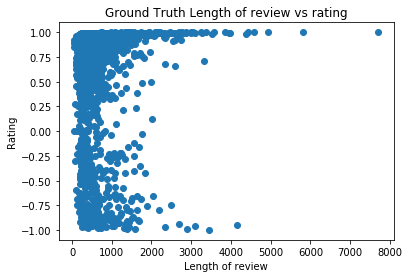

In [48]:
y = finalDf['vader'].values
x = finalDf['reviewColumn'].str.len()
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of review')
plt.title('Ground Truth Length of review vs rating')
fig = plt.gcf()

Text(0, 0.5, 'Rating')

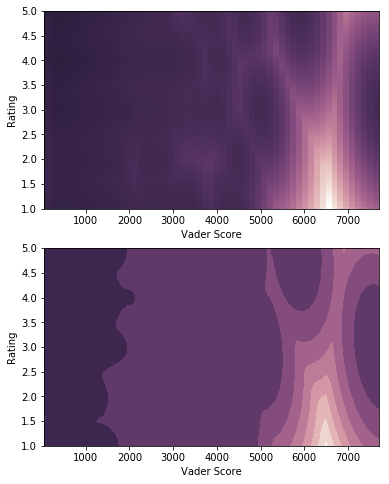

In [37]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Most reviews tended to be short, under 2000, and but there were still a good portion of reviews under 5000 in length.

#### (c)

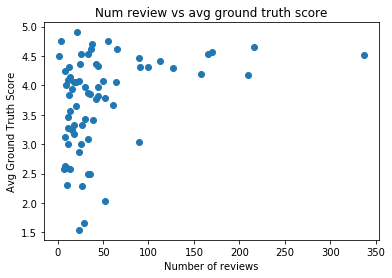

In [46]:
hotelAvgRatingCountGt = pandas.merge(hotelRatingDfGt, finalDf.groupby('hotelName').count(), on='hotelName')

y = hotelAvgRatingCountGt['avgRatingScore'].values
x = hotelAvgRatingCountGt['reviewColumn'].values
plt.plot(x, y,"o")
plt.ylabel('Avg Ground Truth Score')
plt.xlabel('Number of reviews')
plt.title('Num review vs avg ground truth score')
fig = plt.gcf()

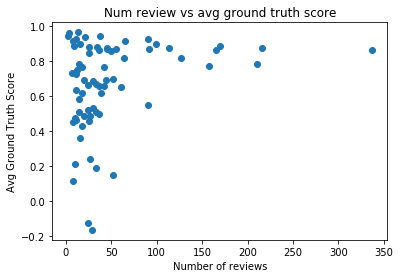

In [47]:
hotelAvgRatingCountV = pandas.merge(hotelRatingDfVader, finalDf.groupby('hotelName').count(), on='hotelName')

y = hotelAvgRatingCountV['avgRatingScore'].values
x = hotelAvgRatingCountV['reviewColumn'].values
plt.plot(x, y,"o")
plt.ylabel('Avg Ground Truth Score')
plt.xlabel('Number of reviews')
plt.title('Num review vs avg ground truth score')
fig = plt.gcf()

Hotels with less reviews had scattered scores, but hotels with more reviews tended to have higher scores.